# Importing Time Series in Python

## Importing and Inspecting Datasets

We will go over how to import time series in python into a pandas dataframe.  We will then inspect the dataframe for missing values, change the column names if necessary, convert the date column to datetime, and set the index for the dataframes. We will then move on to provide the descriptive (summary) statistics, plot the time series, display the frequency of the data with a histogram, and show the distribution of the data, using a kernel density plot. Finally, we will save the dataframes.

We will look at the following datasets:

1. Google trends-- term search count of the word "vacation"
2. Retail Furniture and Furnishing data in Millions of Dollars
3. Adjusted Close Stock price data for Bank of America
4. Adjusted Close Stock price data for J.P. Morgan
5. Monthly Average Temperature data in Fahrenheit for St. Louis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

## Example 1:  Vacation dataset

In [3]:
# Read in data
# https://trends.google.com/trends/explore?date=all&geo=US&q=vacation, google trends, term search of the word "vacation", count data
# Date period range: January 2004 to October 2019, 15 years, data is monthly

vacation = pd.read_csv("vacation.csv", skiprows=2)
vacation.head()

,Month,vacation: (United States)
0,2004-01,94
1,2004-02,89
2,2004-03,86
3,2004-04,79
4,2004-05,89


In [4]:
# Check for missing values
vacation.isna().sum()

Month                        0
vacation: (United States)    0
dtype: int64

In [5]:
# Fix column names
col_names = ['Month','Num_Search_Vacation']
vacation.columns = col_names
vacation.tail()

,Month,Num_Search_Vacation
185,2019-06,58
186,2019-07,56
187,2019-08,45
188,2019-09,38
189,2019-10,37


In [6]:
# Convert to datetime
from datetime import datetime

vacation['Month'] = pd.to_datetime(vacation['Month'])

In [7]:
# Set the 'Month' as index
vacation.set_index('Month', inplace=True)
vacation.head(3)

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86


In [8]:
# Provide the descriptive (summary) statistics
# Generate descriptive statistics that summarize the central tendency, dispersion and 
# shape of a dataset’s distribution, excluding NaN values.
# Percentile values (quantile 1, 2, and 3) on numeric values
vacation.describe()

,Num_Search_Vacation
count,190.000000
mean,60.215789
std,15.513461
min,35.000000
25%,50.000000
50%,56.000000
75%,70.000000
max,100.000000


In [9]:
# Calculate median value (middle value), which is the 50% percentile value, quantile 2
# Mean > median implies that data is right skewed
# Mean < median implies that data is left skewed
vacation.median()

Num_Search_Vacation    56.0
dtype: float64

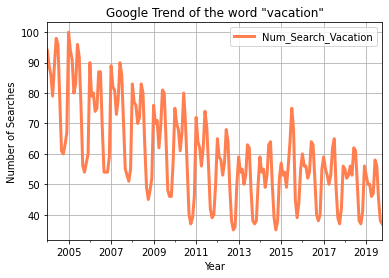

In [10]:
# Plot the time series of google searches of the word "vacation"

plot.style.use('seaborn-deep')
ax = vacation.plot(color='coral', grid=True, linewidth=3)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Searches')
ax.set_title('Google Trend of the word "vacation"')
plot.show()

Visually inspecting the time series above, we can see that it trends downward and then stabilizes around 2013.  There's also periodic patterns or cycles with the low points in the search for the word "vacation", mostly occurring in October of each year, though occasionally it is in November as well. There's a notable spike in June 2015 with 75 counts of the search term "vacation".  The grid lines help us to see that the pattern repeats every year.

In [11]:
# Check options for fonts, lines, styles
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:ylabel='Frequency'>

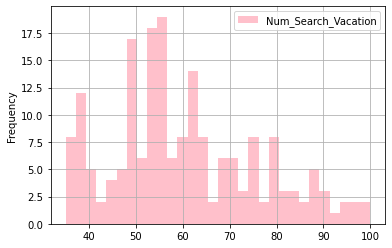

In [12]:
# Plot histogram (frequency of counts), change num of bins to see different plots
vacation.plot(kind='hist', bins=30, color='pink', grid=True)

<AxesSubplot:ylabel='Density'>

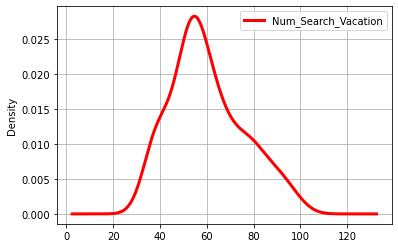

In [13]:
# Calculate kernel density plot
# A density plot shows the distribution of the data over a continuous interval. 
# Kernel density plot smoothes out the noise in time series data.
# The peaks of a density plot help display where values are concentrated over the interval.
# A Kernel density plot is a a better way to display the distribution because it's not affected by 
# the number of bins used (each bar used in a typical histogram).
vacation.plot(kind='density', color="red", grid=True, linewidth=3, fontsize=10)

In [14]:
# saving the dataframe 
vacation.to_csv('vacation1.csv')

## Example 2:  Furniture dataset

In [ ]:
# Source  https://fred.stlouisfed.org/series/RSFHFSN
# Advance Retail Sales: Furniture and Home Furnishings Stores
# Units are in Millions of Dollars, not seasonally adjusted, price
# Date period range is 01/01/1992 to 07/01/2019, monthly data

In [15]:
# Read in data
# Advance Retail Sales: Furniture and Home Furnishings Stores

furniture = pd.read_csv("furniture.csv")
furniture.head()

,DATE,MRTSSM442USN
0,1992-01-01,3846
1,1992-02-01,3908
2,1992-03-01,4157
3,1992-04-01,4141
4,1992-05-01,4275


In [16]:
# Rename columns for ease of reference
col_names = ['Month', 'Millions of Dollars']
furniture.columns = col_names
furniture.head()

,Month,Millions of Dollars
0,1992-01-01,3846
1,1992-02-01,3908
2,1992-03-01,4157
3,1992-04-01,4141
4,1992-05-01,4275


In [17]:
# Check for any null values
furniture.isna().sum()

Month                  0
Millions of Dollars    0
dtype: int64

In [18]:
from datetime import datetime

# Convert the Date column to datetime, notice data is in months
furniture['Month'] = pd.to_datetime(furniture['Month'])

In [19]:
# Set index, use inplace=True
furniture.set_index('Month', inplace=True)

In [20]:
furniture.head()


,Millions of Dollars
Month,
1992-01-01,3846
1992-02-01,3908
1992-03-01,4157
1992-04-01,4141
1992-05-01,4275


In [21]:
# Obtain the descriptive (summary) statistics
furniture.describe()

,Millions of Dollars
count,331.000000
mean,7553.815710
std,1666.744055
min,3846.000000
25%,6484.500000
50%,7651.000000
75%,8794.500000
max,11297.000000


Notice that the mean is 7553.8 and the median is 7651.0.  The maximum value in the dataset is 11297.0 and the minimum value is 3846.0.  

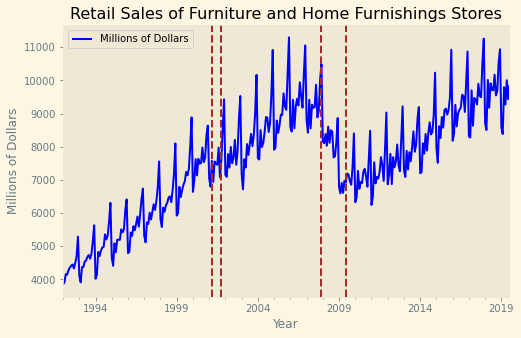

In [22]:
# Plot 

plot.style.use('Solarize_Light2')
ax = furniture.plot(color='blue', grid=False, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars')
ax.set_title('Retail Sales of Furniture and Home Furnishings Stores')
# Add a brown vertical line
ax.axvline('2001-03-01', color='brown', linestyle='--')
ax.axvline('2001-10-01', color='brown', linestyle='--')

ax.axvline('2007-12-01', color='brown', linestyle='--')
ax.axvline('2009-06-01', color='brown', linestyle='--')
plot.show()

<AxesSubplot:ylabel='Frequency'>

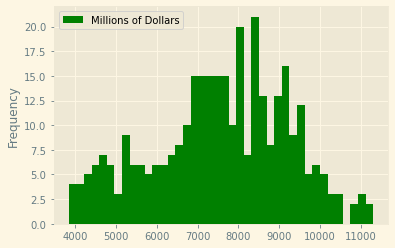

In [23]:
# Plot histogram (frequency of counts), change num of bins to see different plots
furniture.plot(kind='hist', bins=40, color='green', grid=True)

# frequency count of column 'Millions of Dollars' 
#count = furniture['Millions of Dollars'].value_counts()
#print(count)

<AxesSubplot:ylabel='Density'>

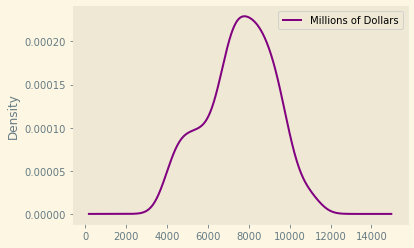

In [24]:
# Calculate kernel density plot
# A density plot shows the distribution of the data over a continuous interval. 
# Kernel density plot smoothes out the noise in time series data.
# The peaks of a density plot help display where values are concentrated over the interval.
# A Kernel density plot is a a better way to display the distribution because it's not affected by 
# the number of bins used (each bar used in a typical histogram).
furniture.plot(kind='kde', color="purple", grid=False)

### Price Adjustment

In [ ]:
# https://fred.stlouisfed.org/series/CPIAUCSL
#  Consumer Price Index: All Items in U.S. City Average, All Urban Consumers (CPIAUCSL)
# Index 1982-1984=100, Seasonally Adjusted
# Period is 1992-01-01 to 2019-07-01, monthly
# Unit is millions of dollars
# Updated Oct. 10, 2019

In [25]:
# Read in cpi data
#  #  https://www.minneapolisfed.org/community/financial-and-economic-education/cpi-calculator-information
cpi = pd .read_csv('CPI.csv')
cpi.head()

,DATE,CPIAUCNS
0,1/1/92,138.1
1,2/1/92,138.6
2,3/1/92,139.3
3,4/1/92,139.5
4,5/1/92,139.7


In [26]:
cpi.tail()


,DATE,CPIAUCNS
326,3/1/19,254.202
327,4/1/19,255.548
328,5/1/19,256.092
329,6/1/19,256.143
330,7/1/19,256.571


July 2019 is the most current CPI data that we have.

In [27]:
# convert to python list
cpi_list = cpi['CPIAUCNS'].to_list()

In [28]:
# Create a new column in the dataframe
furniture['CPI'] = cpi_list
furniture.head()

,Millions of Dollars,CPI
Month,,
1992-01-01,3846,138.1
1992-02-01,3908,138.6
1992-03-01,4157,139.3
1992-04-01,4141,139.5
1992-05-01,4275,139.7


In [29]:
# We will use July 2019 (last value in series)
july2019_cpi = 256.161

In [30]:
# Calculate the CPI for all months from 1992 to 2019 by dividing by the July 2019 CPI value
furniture['CPI_July19_rate'] = furniture['CPI']/july2019_cpi
furniture.head()

,Millions of Dollars,CPI,CPI_July19_rate
Month,,,
1992-01-01,3846,138.1,0.539114
1992-02-01,3908,138.6,0.541066
1992-03-01,4157,139.3,0.543799
1992-04-01,4141,139.5,0.544579
1992-05-01,4275,139.7,0.545360


In [31]:
# Calculate the furniture sales (millions of dollars) in terms of July 2019 dollars
furniture['furniture_price_adjusted'] = furniture['Millions of Dollars'] * furniture['CPI_July19_rate']
furniture.head(10)

,Millions of Dollars,CPI,CPI_July19_rate,furniture_price_adjusted
Month,,,,
1992-01-01,3846,138.1,0.539114,2073.432724
1992-02-01,3908,138.6,0.541066,2114.485812
1992-03-01,4157,139.3,0.543799,2260.570891
1992-04-01,4141,139.5,0.544579,2255.103236
1992-05-01,4275,139.7,0.545360,2331.414618
1992-06-01,4357,140.2,0.547312,2384.638567
1992-07-01,4407,140.5,0.548483,2417.165376
1992-08-01,4446,140.9,0.550045,2445.498729
1992-09-01,4328,141.3,0.551606,2387.351705


In [32]:
# Create a new dataframe that specifies the column we want
furniture_adjusted = furniture[['furniture_price_adjusted']]
furniture_adjusted.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


The prices are adjusted by consumer price index in terms of July 2019 dollars.

In [33]:
# saving the dataframe, which has the sales adjusted to July 2019 prices
furniture_adjusted.to_csv('furniture1.csv')

## Example 3:  Bank of America dataset

In [34]:
import pandas_datareader
from pandas_datareader import data

# Adjusted Close Stock Price data for Bank of America, source is Yahoo finance
# Only get the adjusted close.
# bac = data.DataReader("BAC", 
#                       start='1990-1-1', 
#                       end='2019-10-15', 
#                       data_source='yahoo')['Adj Close']

# bac.plot(title=' Bank of America Adj. Closing Price', figsize=(10,5))

# bac.to_csv('bac.csv')

In [35]:
bac = pd.read_csv('bac.csv')

In [36]:
# Check for missing values
bac.isna().sum()

Date               0
Adj Close Price    0
dtype: int64

In [37]:
bac.columns

Index(['Date', 'Adj Close Price'], dtype='object')

In [ ]:
# Convert to datetime
from datetime import datetime
bac['Date'] = pd.to_datetime(bac['Date'])

In [38]:
# Set index, use inplace=True
bac.set_index('Date', inplace=True)

In [39]:
bac.head()

,Adj Close Price
Date,
1/2/90,1.711862
1/3/90,1.725632
1/4/90,1.688917
1/5/90,1.652200
1/8/90,1.661379


In [40]:
# Provide the descriptive (summary) statistics
# Generate descriptive statistics that summarize the central tendency, dispersion and 
# shape of a dataset’s distribution, excluding NaN values.
# Percentile values (quantile 1, 2, and 3) on numeric values
bac.describe()

,Adj Close Price
count,7507.000000
mean,16.313610
std,10.910945
min,0.699197
25%,7.526543
50%,14.318160
75%,23.844322
max,43.195049


<AxesSubplot:ylabel='Frequency'>

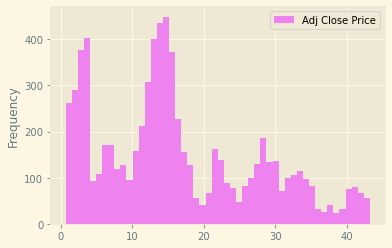

In [41]:
# Plot histogram (frequency of counts), change num of bins to see different plots
bac.plot(kind='hist', bins=50, color='violet', grid=True)

<AxesSubplot:ylabel='Density'>

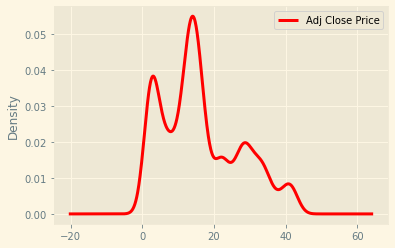

In [42]:
# Calculate kernel density plot
# A density plot shows the distribution of the data over a continuous interval. 
# Kernel density plot smoothes out the noise in time series data.
# The peaks of a density plot help display where values are concentrated over the interval.
# A Kernel density plot is a a better way to display the distribution because it's not affected by 
# the number of bins used (each bar used in a typical histogram).
bac.plot(kind='density', color="red", grid=True, linewidth=3, fontsize=10)

In [43]:
# saving the dataframe 
bac.to_csv('df_bankofamerica.csv')

## Example 4:  J.P. Morgan dataset

In [44]:
import pandas_datareader
from pandas_datareader import data

# Adjusted Close Stock Price data for J.P. Morgan, source is Yahoo finance
# jpm = data.DataReader("JPM", 
#                       start='1990-1-1', 
#                       end='2019-10-15', 
#                       data_source='yahoo')['Adj Close']

# jpm.plot(title='J.P. Morgan Adj. Closing Price', figsize=(10,5))
# jpm.to_csv('jpm.csv')

In [45]:
# Read in data
jpm = pd.read_csv('jpm.csv')
jpm.head()

,Date,Adj Close Price
0,1/2/90,3.610043
1,1/3/90,3.730377
2,1/4/90,3.745418
3,1/5/90,3.760463
4,1/8/90,3.760463


In [46]:
# Check for missing values
jpm.isna().sum()

Date               0
Adj Close Price    0
dtype: int64

In [47]:
# Convert to datetime
from datetime import datetime
jpm['Date'] = pd.to_datetime(jpm['Date'])

In [48]:
# Set index, use inplace=True
jpm.set_index('Date', inplace=True)

In [49]:
jpm.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


In [50]:
# Provide the descriptive (summary) statistics
# Generate descriptive statistics that summarize the central tendency, dispersion and 
# shape of a dataset’s distribution, excluding NaN values.
# Percentile values (quantile 1, 2, and 3) on numeric values
jpm.describe()

,Adj Close Price
count,7507.000000
mean,32.188869
std,26.437688
min,1.319170
25%,15.099022
50%,26.953051
75%,35.899326
max,119.959999


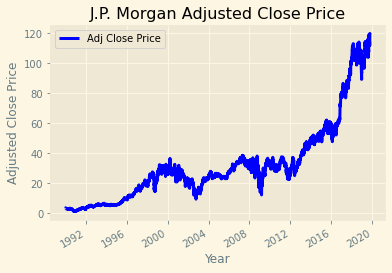

In [51]:
# Plot the time series for J.P. Morgan Adjusted Close Price

plot.style.use('tableau-colorblind10')
ax = jpm.plot(color='blue', grid=True, linewidth=3)
ax.set_xlabel('Year')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('J.P. Morgan Adjusted Close Price')
plot.show()

<AxesSubplot:ylabel='Frequency'>

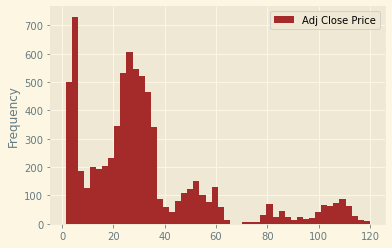

In [52]:
# Plot histogram (frequency of counts), change num of bins to see different plots
jpm.plot(kind='hist', bins=50, color='brown', grid=True)

<AxesSubplot:ylabel='Density'>

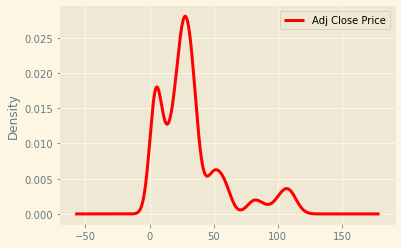

In [53]:
# Calculate kernel density plot
# A density plot shows the distribution of the data over a continuous interval. 
# Kernel density plot smoothes out the noise in time series data.
# The peaks of a density plot help display where values are concentrated over the interval.
# A Kernel density plot is a a better way to display the distribution because it's not affected by 
# the number of bins used (each bar used in a typical histogram).
jpm.plot(kind='density', color="red", grid=True, linewidth=3, fontsize=10)

In [54]:
# saving the dataframe 
jpm.to_csv('df_jpmorgan.csv')

## Example 5: Average Temperature dataset

In [ ]:
# Source:  National Centers for Environmental Information, National Oceanic and Atmospheric Administration
# https://www.ncdc.noaa.gov/cag/city/time-series/USW00013994/tavg/all/1/1930-2019?base_prd=true&begbaseyear=1930&endbaseyear=2000
# Average Temperature, all months, Saint Louis, Missouri,  1938-04 to 2019-01
# Anomaly:  Departure from mean (relative to month) 1938-2000 base period,  Missing value is -99.0
# https://www.ncdc.noaa.gov/cag/city/time-series/USW00013994-tavg-all-1-1930-2019.csv?base_prd=true&begbaseyear=1938&endbaseyear=2000

In [55]:
temp = pd.read_csv("stl_temp.csv", skiprows=4, infer_datetime_format=True)
temp.head()

,Date,Value,Anomaly
0,193804,56.5,0.3
1,193805,64.7,-1.4
2,193806,73.5,-1.8
3,193807,80.4,1.0
4,193808,81.3,3.6


In [56]:
# Recall that missing value is set to -99.0 so isna().sum() will not help in this case
temp.isna().sum()

Date       0
Value      0
Anomaly    0
dtype: int64

In [57]:
# Query to find missing value assigned to -99.0, determine the index position
Index_position = temp.query('Value == -99.0').index.tolist() 
Index_position

[899]

In [58]:
temp['Value'].loc[898,]

35.5

In [59]:
temp['Value'].loc[900,]

55.3

In [60]:
new_val = (temp['Value'].loc[898,] + temp['Value'].loc[900,])/2
new_val

45.4

In [61]:
# Let's put NaN instead of -99.0. You will need to use numpy's nan
# At row 899 and column Value, set to NaN, using Numpy way

temp.at[899, 'Value'] = np.nan
temp['Value'].loc[899,]

nan

In [62]:
# Now, check for Nan
temp.isna().sum()

Date       0
Value      1
Anomaly    0
dtype: int64

In [63]:
# Now, let's use interpolation method to put a value in the Nan's place
temp = temp.interpolate(method ='linear', limit_direction ='forward') 

In [64]:
# Check the value where previously nan (null value) originally coded as -99.0 was at
temp['Value'].loc[899,]

45.4

In [65]:
# Convert to datetime format
temp['Date'] = pd.to_datetime(temp['Date'], format='%Y%m')

In [66]:
# Set the index as Date column
temp.set_index('Date', inplace=True)

In [67]:
temp.head()

,Value,Anomaly
Date,,
1938-04-01,56.5,0.3
1938-05-01,64.7,-1.4
1938-06-01,73.5,-1.8
1938-07-01,80.4,1.0
1938-08-01,81.3,3.6


In [68]:
temp.describe()

,Value,Anomaly
count,970.000000,970.000000
mean,56.449588,0.291856
std,17.538847,5.972663
min,13.800000,-143.200000
25%,40.500000,-1.800000
50%,58.250000,0.500000
75%,73.200000,2.900000
max,87.900000,16.800000


In [69]:
# Subset out the column of interest
temp = temp[['Value']]
temp.head()

,Value
Date,
1938-04-01,56.5
1938-05-01,64.7
1938-06-01,73.5
1938-07-01,80.4
1938-08-01,81.3


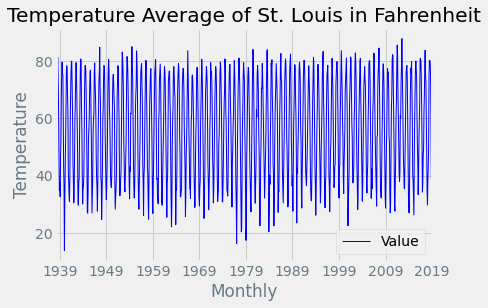

In [70]:
# Plot the time series for Temperature

plot.style.use('fivethirtyeight')
ax = temp.plot(color='blue', grid=True, linewidth=1)
ax.set_xlabel('Monthly')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Average of St. Louis in Fahrenheit')
plot.show()

<AxesSubplot:ylabel='Frequency'>

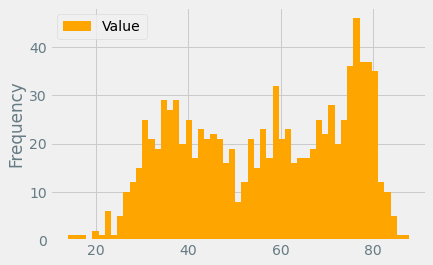

In [71]:
# Plot histogram (frequency of counts), change num of bins to see different plots
temp.plot(kind='hist', bins=55, color='orange', grid=True)

<AxesSubplot:ylabel='Density'>

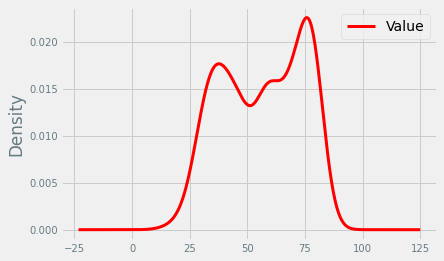

In [72]:
# Calculate kernel density plot
# A density plot shows the distribution of the data over a continuous interval. 
# Kernel density plot smoothes out the noise in time series data.
# The peaks of a density plot help display where values are concentrated over the interval.
# A Kernel density plot is a a better way to display the distribution because it's not affected by 
# the number of bins used (each bar used in a typical histogram).
temp.plot(kind='density', color="red", grid=True, linewidth=3, fontsize=10)

In [73]:
# saving the dataframe 
temp.to_csv('temp1.csv')

In [74]:
# end

In [ ]:
thanks for watching